# Perceptron

## Activation Functions

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
X = np.arange(-10., 10., 0.2)

## Threshold Function

In [0]:
def threshold(X):
  y=[]
  for i in X:
    if i>1.5:
      y.append(1)
    else:
      y.append(0)
  return y

In [0]:
thres_X=threshold(X)

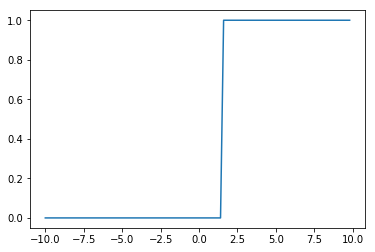

In [0]:
plt.plot(X,thres_X)

### Sigmoid Function

In [0]:
def sigmoid(X):
  y = (1/(1+np.exp(-X)))
  return y

In [0]:
x_sig = sigmoid(X)

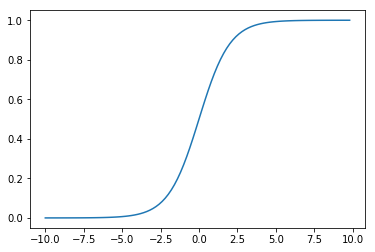

In [0]:
plt.plot(X,x_sig)

### TanH Function

In [0]:
def tanh(X):
  y = ((np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X)))
  return y

In [0]:
tan_X = tanh(X)

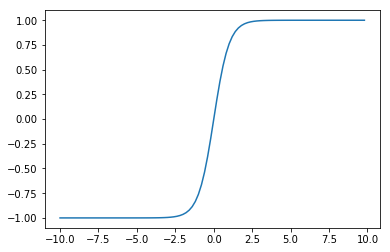

In [0]:
plt.plot(X,tan_X)

### ReLU Function

In [0]:
def relu(X):
  y=np.maximum(0,X)
  return y

In [0]:
rel_X = relu(X)

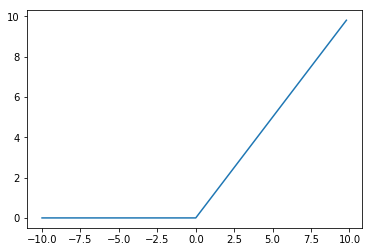

In [0]:
plt.plot(X,rel_X)

### Leaky ReLU

In [0]:
def Lrelu(X):
  y=np.maximum(0.1*X,X)
  return y

In [0]:
lrel_x = Lrelu(X)

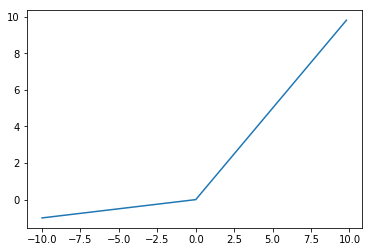

In [0]:
plt.plot(X,lrel_x)

## Convexity Analysis

### Sum of Squares Error


In [0]:
def diff(Y,hyp):
  val=0
  for j in range(len(Y)):
    val=val+((hyp[j]-Y[j])**2)
  return val

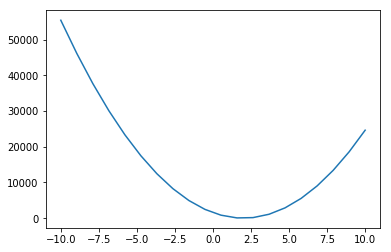

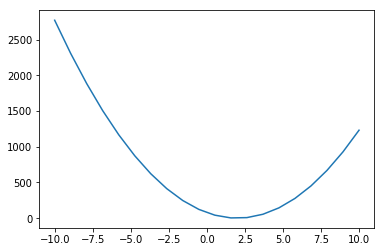

In [0]:
x=np.arange(1,11)
yout=[]
y=[]
sse=[]
mse=[]
for i in x:
  yout.append(i*2)
a=np.linspace(-10,10,num=20)
for i in a:
  for j in x:
    y.append(j*i)
  sse.append(diff(y,yout))
  mse.append(diff(y,yout)/20)
  y.clear()
plt.plot(a,sse)
plt.show()
plt.plot(a,mse)
plt.show()

In [0]:
def CrossEntropy(yHat, y):
  if y == 1:
    return -np.log(yHat)
  else:
    return -np.log(1 - yHat)

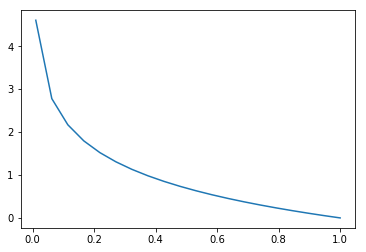

In [0]:
loss=[]
yhat=np.linspace(0.01,1,num=20)
for i in yhat:
  loss.append(CrossEntropy(i,1))
plt.plot(yhat,loss)
plt.show()

## Perceptron

In [0]:
import itertools
#x = list(itertools.product([0,1],repeat=2))
#y=[0,0,0,1]
x=[[0.958,0.003],[1.043,0.001],[1.907,0.003],[0.78,0.002],[0.579,0.001],[0.003,0.105],[0.001,1.748],[0.014,1.839],[0.007,1.021],[0.004,0.214]]
y=[1,1,1,1,1,0,0,0,0,0]
w=[0.5,0.5,0.5]
threshold=0.5
eta=0.2

print(perceptron(x,y,w,eta,threshold))

[0.3, 0.7708, -0.21960000000000005]


In [0]:
#perceptron for two columns
def perceptron(x,y,w,eta,threshold):
  prev=list()
  while prev!=w:
    prev=w.copy()
    for i in range(len(y)):
      sum=w[0]+x[i][0]*w[1]+x[i][1]*w[2]
      if sum<threshold:
        sum=0
      else:
        sum=1
        
      if sum!=y[i]:
        while sum!=y[i]:
          w[0]=w[0]+eta*(y[i]-sum)
          w[1]=w[1]+eta*(y[i]-sum)*x[i][0]
          w[2]=w[2]+eta*(y[i]-sum)*x[i][1]
          sum=w[0]+x[i][0]*w[1]+x[i][1]*w[2]
          if sum<threshold:
            sum=0
          else:
            sum=1
  return w  
        

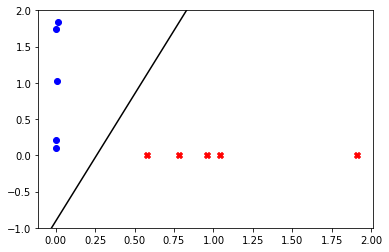

In [0]:
df=pd.DataFrame(x)
plt.scatter(df[0][0:5],df[1][0:5],color='r',marker='X')
plt.scatter(df[0][5:10],df[1][5:10],color='b',marker='o')

xmin,xmax=plt.xlim()
axes = plt.gca()
axes.set_ylim([-1,2])
axes.set_xlim([xmin,xmax])

xinter=(threshold-w[0])/w[1]
yinter=(threshold-w[0])/w[2]
slope=-yinter/xinter
xx=np.linspace(xmin,xmax)
yy=slope*xx+yinter

plt.plot(xx,yy,'k-')
#plt.plot([xinter,0],[0,yinter])
plt.show()

In [0]:
import pandas as pd
x=pd.read_csv('iris.csv',header=None)

In [0]:
ylist=[]
for i in range(50):
  ylist.append(1)
for i in range(50):
  ylist.append(0)

In [0]:
x=x[[0,1]]
x=x[:100]
xlist=x.values.tolist()

In [0]:
#perceptron for four columns
def perceptronFour(x,y,w,eta,threshold):
  prev=list()
  while prev!=w:
    prev=w.copy()
    for i in range(len(y)):
      sum=w[0]+x[i][0]*w[1]+x[i][1]*w[2]+w[3]*x[i][2]+w[4]*x[i][3]
      if sum<threshold:
        sum=0
      else:
        sum=1
        
      if sum!=y[i]:
        while sum!=y[i]:
          w[0]=w[0]+eta*(y[i]-sum)
          w[1]=w[1]+eta*(y[i]-sum)*x[i][0]
          w[2]=w[2]+eta*(y[i]-sum)*x[i][1]
          w[3]=w[3]+eta*(y[i]-sum)*x[i][2]
          w[4]=w[4]+eta*(y[i]-sum)*x[i][3]
          sum=w[0]+x[i][0]*w[1]+x[i][1]*w[2]+w[3]*x[i][2]+w[4]*x[i][3]
          if sum<threshold:
            sum=0
          else:
            sum=1
  return w  
        

In [0]:
w=[0,0,0]
threshold=0
eta=0.2
print(perceptron(xlist,ylist,w,eta,threshold))

[24.999999999999943, -15.799999999999814, 20.060000000000244]


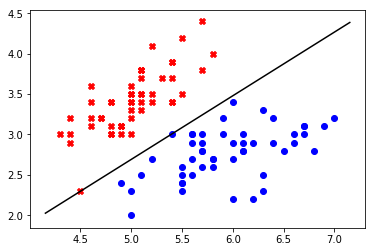

In [0]:
df=pd.DataFrame(xlist)
plt.scatter(df[0][0:50],df[1][0:50],color='r',marker='X')
plt.scatter(df[0][50:100],df[1][50:100],color='b',marker='o')

xmin,xmax=plt.xlim()
axes = plt.gca()
#axes.set_ylim([-1,2])
#axes.set_xlim([xmin,xmax])

xinter=(threshold-w[0])/w[1]
yinter=(threshold-w[0])/w[2]
slope=-yinter/xinter

xx=np.linspace(xmin,xmax)
yy=slope*xx+yinter

plt.plot(xx,yy,'k-')
#plt.plot([xinter,0],[0,yinter])
plt.show()

# Logistic Regression

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import KFold

## Convexity Analysis

In [0]:
def LogLikelihoodLoss(p):
  loss0=[]
  loss1=[]
  for i in range(len(p)):
    y=1 #if p[i]>0.5 else 0
    loss0.append((y*math.log(p[i])+(1-y)*math.log(1-p[i])))
    y=0
    loss1.append((y*math.log(p[i])+(1-y)*math.log(1-p[i])))
  plt.plot(p,loss0)
  plt.plot(p,loss1)
  plt.show()

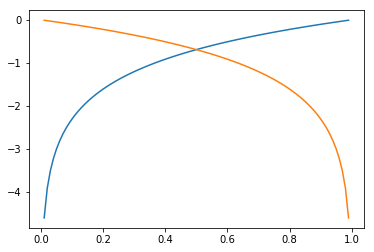

In [0]:
p=list(np.linspace(0,1,101))
p.remove(0)
p.remove(1)
LogLikelihoodLoss(p)

## SGA and BGA functions

In [0]:
def logisticSGA(x,y,w,cnt,eta):
  for j in range(cnt):
    for i in range(len(y)):
      sig=1/(1+np.exp(-np.dot(w,x[i])))
      yhat=0 if sig<0.5 else 1
      
      if yhat!=y[i]:
        w=w+eta*(y[i]-sig)*x[i]
  return w

In [0]:
def logisticBGA(x,y,w,cnt,eta):
  for j in range(cnt):
    grad=0
    for i in range(len(y)):
      sig=1/(1+np.exp(-np.dot(w,x[i])))
      yhat=0 if sig<0.5 else 1
      
      grad=grad+eta*(y[i]-sig)*x[i]
    w=w+grad
  return w

## Data engineering

In [0]:
data=pd.read_csv("WBCD.txt",header=None)
data.columns=['id','ct','ucsi','ucsh','mar','secs','bn','bc','nn','m','c']
data['id']=1
data=data.loc[data['bn']!='?']
data['bn']=data['bn'].astype(int)
y=np.where(data.c==2,0,1)
data=data.drop(columns=['c'])
x=np.array(data)

## calculate weights

In [0]:
#x=np.array([[1,2.7,2.5],[1,1.5,2.3],[1,3.4,4.4],[1,1.3,1.9],[1,3.1,3],[1,7.6,2.8],[1,5.3,2.1],[1,6.9,1.8],[1,8.7,0.2],[1,7.7,3.5]])
#y=[0,0,0,0,0,1,1,1,1,1]
w=np.zeros((1,len(x[0])))[0]
eta=0.3
w=logisticBGA(x,y,w,100,eta)
w

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


array([-1237.43226359,    46.66625932,   271.17374277,   113.66911285,
          59.11920679,  -137.56551673,   149.56211231,   -66.6073179 ,
         103.26965238,    39.78760515])

## Measures and Plots

In [0]:
def predict(x,y,w):
  yhat=[]
  for i in range(len(y)):
    yhat.append(0)
    sig=1/(1+np.exp(-np.dot(w.T,x[i])))
    yhat[i]=0 if sig<0.5 else 1
  cm=confusion_matrix(y,yhat)
  measures=precision_recall_fscore_support(y,yhat)
  acc=accuracy_score(y,yhat)
  return measures,acc,cm


measures,acc,cm=predict(x,y,w)
print('confusionMatrix:\n',cm)
print('precision:',measures[0][0])
print('recall:',measures[1][0])
print('f score:',measures[2][0])
print('accuracy:',acc)

confusionMatrix:
 [[414  30]
 [  2 237]]
precision: 0.9951923076923077
recall: 0.9324324324324325
f score: 0.9627906976744187
accuracy: 0.9531478770131772


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [0]:
xdata=[np.dot(w,X) for X in x]
ydata=[1/(1+np.exp(-X)) for X in xdata]

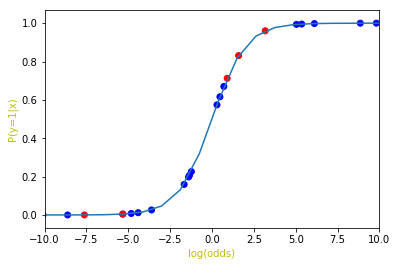

In [0]:
xplt=np.linspace(-100,350,num=400)
yplt=[1/(1+np.exp(-X)) for X in xplt]
color=np.where(y==0,'r','b')

plt.plot(xplt,yplt)
plt.xlabel("log(odds)",color='y')
plt.ylabel("P(y=1|x)",color='y')
plt.scatter(xdata,ydata,c=color)
axes=plt.gca()
axes.set_xlim(-10,10)

plt.show()

In [0]:
def ROC(yact,yprob,n,p):
  yprob,yact=zip(*sorted(zip(yprob,yact)))
  xplt,yplt=[],[]
  tpr,fpr,i=0,0,len(yact)-1
  auc=0
  while i>=0:
    if yact[i]==1:
      tpr+=1/p
    else:
      fpr+=1/n
      auc+=tpr
    xplt.append(fpr)
    yplt.append(tpr)
    i-=1
  plt.plot(xplt,yplt)
  plt.title("ROC curve",color='y')
  plt.xlabel("FPR",color='y')
  plt.ylabel("TPR",color='y')
  plt.show()
  
  print("AUC:",auc/n)
    

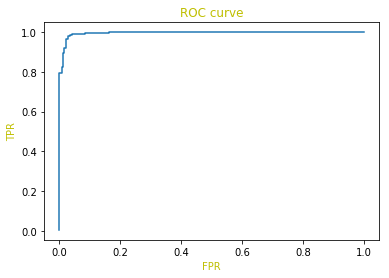

AUC: 0.995665121188133
AUC built-in: 0.9920841343435485


In [0]:
ROC(y,ydata,444,239)
print("AUC built-in:",roc_auc_score(y,ydata))

## K fold

In [0]:
scores=[]
cv=KFold(n_splits=10,random_state=1,shuffle=False)

for train_index,test_index in cv.split(x):
  Xtrain,Xtest,Ytrain,Ytest=x[train_index],x[test_index],y[train_index],y[test_index]
  w=np.zeros((1,len(x[0])))[0]
  eta=0.3
  w=logisticBGA(Xtrain,Ytrain,w,100,eta)
  measures,acc,cm=predict(Xtest,Ytest,w)
  scores.append(acc)
print("K fold mean accuracy:",np.mean(scores))
  
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


K fold mean accuracy: 0.9357203751065644


## Image Classification

Image Data Shape (1797, 64)
Label Data Shape (1797,)


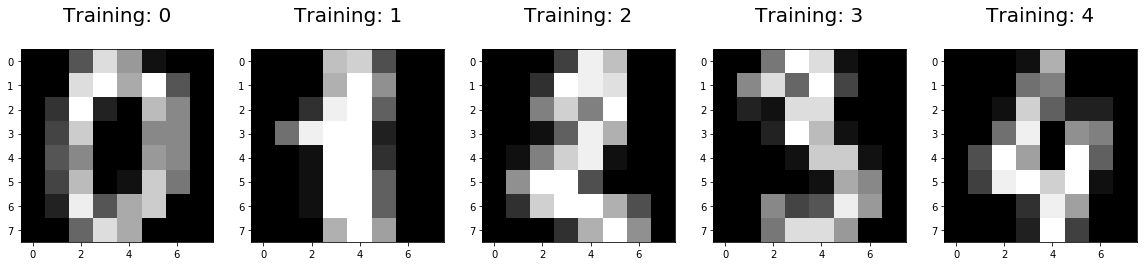

In [0]:
from sklearn.datasets import load_digits
digits=load_digits()

print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Xtrain,Xtest,Ytrain,Ytest=train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
lr=LogisticRegression(solver='lbfgs',max_iter=10000,multi_class='auto')
lr.fit(Xtrain,Ytrain)
pred=lr.predict(Xtest)
print(confusion_matrix(Ytest,pred))
print("Accuracy:",lr.score(Xtest,Ytest))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]
Accuracy: 0.9533333333333334


### resizing and converting to grayscale

In [0]:
'''
import cv2


#use glob instead (for i in glob.iglob(path with /*))
for i in range(29):
    name=str(i+1)
    image = cv2.imread('F:/sem5/SUL/meera/'+name+'.jpg')
    scale_percent = 50 # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
# resize image
    image = cv2.resize(image, (90,120), interpolation = cv2.INTER_AREA)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  
#cv2.imshow('Original image',image)
#cv2.imshow('Gray image', gray)
    cv2.imwrite('F:/sem5/SUL/meeraGS/'+name+'.jpg',gray)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
'''

### Converting pixels as list to csv file

In [0]:
'''csvData=[]
from PIL import Image
for i in range(29):
    name=str(i+1)
    im = Image.open('F:/sem5/SUL/meeraGS/'+name+'.jpg','r')
    csvData.append( list(im.getdata()))
for i in range(13):
    name=str(i+1)
    im = Image.open('F:/sem5/SUL/moniGS/'+name+'.jpg','r')
    csvData.append( list(im.getdata()))

import csv
with open('F:/sem5/SUL/data.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvData)
csvFile.close()'''

"csvData=[]\nfrom PIL import Image\nfor i in range(29):\n    name=str(i+1)\n    im = Image.open('F:/sem5/SUL/meeraGS/'+name+'.jpg','r')\n    csvData.append( list(im.getdata()))\nfor i in range(13):\n    name=str(i+1)\n    im = Image.open('F:/sem5/SUL/moniGS/'+name+'.jpg','r')\n    csvData.append( list(im.getdata()))\n\nimport csv\nwith open('F:/sem5/SUL/data.csv', 'a') as csvFile:\n    writer = csv.writer(csvFile)\n    writer.writerows(csvData)\ncsvFile.close()"

### Trial of L.R.

In [0]:
#attempt to classify personal gallery
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Xtrain=pd.read_csv('data.csv',header=None)
Ytrain=[]
for i in range(29):
  Ytrain.append(1)
for i in range(13):
  Ytrain.append(0)

lr=LogisticRegression(solver='lbfgs',max_iter=1000,multi_class='auto')
lr.fit(Xtrain[10:36],Ytrain[10:36])
pred=lr.predict(Xtrain)
print(confusion_matrix(Ytrain,pred))
print("Accuracy:",lr.score(Xtrain,Ytrain))

[[ 9  4]
 [ 1 28]]
Accuracy: 0.8809523809523809


# Bayesian Classifier for Discrete Values

## Data extraction

In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.read_csv("spam_ham.csv",header=None)
data.columns=['w1','w2','w3','w4','w5','w6','w7','w8','target']
y=data[['target']]
x=data.drop(columns=['target'])
loss=np.array([[0,0.5],[0.2,0]])

## Calculation of conditional and prior probabilities

In [0]:
xprob,yprob=[],[]
for i in x.columns:
  xprob.append(data.groupby('target')[i].value_counts()/data.groupby('target')[i].count())
yprob.append(y.target.value_counts(1))
n=y.target.nunique()      #number of targets
targets=y.target.unique().tolist()      #list of targets
xprob,yprob

## Prediction for a given test data

In [0]:
def BayesianClassifierPredict(test):
  p=[]
  for j in range(n):
    p.append(1)
  for j in range(n):
    for i in range(len(test)):
      try:
        temp=xprob[i][targets[j]][test[i]]
      except KeyError:
        temp=0
      p[j]*=temp
    p[j]*=yprob[0][targets[j]]
  den=sum(p)
  return p/den

## Test without Risk Analysis

In [0]:
test=[[1,0,0,1,1,1,0,1],[0,1,1,0,1,0,1,0]]
for j in range(len(test)):
  p=BayesianClassifierPredict(test[j])
  print('test case',j+1)
  for i in range(n):
    print('\tclass',targets[i],":",p[i])

test case 1
	class 1 : 0.9980656818434983
	class 0 : 0.0019343181565018254
test case 2
	class 1 : 0.01975717832602507
	class 0 : 0.9802428216739749


## Test with Risk Analysis

In [0]:
test=[[1,0,0,1,1,1,0,1],[0,1,1,0,1,0,1,0]]
for i in range(len(test)):
  prob=BayesianClassifierPredict(test[i])
  risk=np.dot(prob,loss.T)
  print("test case",i+1,": spam" if risk[0]<risk[1] else ": ham")

test case 1 : spam
test case 2 : ham


# Bayesian Classifier for Continuous Values

In [0]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import math

In [0]:
data=pd.read_csv('spam_ham.csv',header=None)
data.columns=['w1','w2','w3','w4','w5','w6','w7','w8','target']
data.head(11)
x=data.copy()
x=x.drop(columns=['target'])

In [0]:
mean=[[],[]]
temp_var=[[],[]]
for i in range(2):
  for j in x.columns:
    mean[i].append(np.mean(data[j].loc[data.target==i]))
    temp_var[i].append(np.var(data[j].loc[data.target==i]))
  mean[i]=np.array(mean[i])
var=[[],[]]
for i in range(len(temp_var)):
  for j in range(len(temp_var[0])):
    var[i].append( [0]*j + [temp_var[i][j]] + [0]*(len(temp_var[0])-j-1) )
  var[i]=np.array(var[i])
  

In [0]:
def bayesian(x,mean,var):
  p=[]
  for i in range(2):
    m=distance.mahalanobis(x,mean[i],np.linalg.inv(var[i]))**2
    p.append(np.exp(-m/2) / (2*math.pi*(np.linalg.det(var[i])**.5)) ) 
  return p/sum(p)
  

In [0]:
test=[np.array([1,0,0,1,1,1,0,1]),np.array([0,1,1,0,1,0,1,0])]
for i in range(2):
  prob=bayesian(test[i],mean,var)
  print("test case",i+1,':ham' if prob[0]>prob[1] else ':spam')

test case 1 :spam
test case 2 :ham


# K-NN

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
data=pd.read_csv('iris.csv',header=None)
data.columns=['x1','x2','x3','x4','y']

In [0]:
def euclidean_dist(a,b):
  sum=0
  for i in range(len(a)-1):
    sum+=(a[i]-b[i])**2
  return sum**0.5

In [0]:
def knn(train,test,k,mode):
  train=train.copy()
  train['dist']=train.apply(lambda x:euclidean_dist(x,test),axis=1)
  train=train.sort_values('dist')
  #train=train.reset_index()
  train=train[:k]
  if mode=='classification':
    c=train.y.value_counts()
    c=sorted(c.items(),key=lambda x:x[1],reverse=True)
    return c[0][0]
  return np.mean(train.y)

In [0]:
x_data=data.copy()
x_data=x_data.drop(columns=['y'])
y_data=data['y'].copy()

train,test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,shuffle=True,random_state=2)
test,valid,y_test,y_valid=train_test_split(test,y_test,test_size=0.5,shuffle=True,random_state=2)
train['y']=y_train
test['y']=y_test
valid['y']=y_valid

In [0]:
K=[1,3,5]
acc=[]
for k in K:
  cnt=0
  for val in valid.values:
    if knn(train,val,k,'classification')==val[len(val)-1]:
      cnt+=1
  acc.append(cnt/len(valid))
print('Validation: The best k for this data is',K[acc.index(max(acc))])
for i in range(len(K)):
  print('k:',K[i],',acc:',acc[i])

k=K[acc.index(max(acc))]
cnt=0
for val in test.values:
  if knn(train,val,k,'classification')==val[len(val)-1]:
    cnt+=1
print('Accuracy for test with k =',k,':',cnt/len(test))

Validation: The best k for this data is 1
k: 1 ,acc: 1.0
k: 3 ,acc: 1.0
k: 5 ,acc: 1.0
Accuracy for test with k = 1 : 1.0


# Decision Tree

In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.read_csv('cancer.txt')
data=data.drop(columns=['id'])
data=data.loc[data['bn']!='?']
data.bn=data.bn.astype(int)

## Measures

### Entropy

In [0]:
def entropy(data):
  ycnt=np.array([len(data.c.loc[data.c==2]),len(data.c.loc[data.c==4])])
  ycnt=ycnt/sum(ycnt)
  if 0 in ycnt:
    return 0
  return -sum([i*np.log2(i) for i in ycnt ])
print('Entropy:',entropy(data))

Entropy: 0.9340026588217947


### Conditional Entropy

In [0]:
def conditionalEntropy(data,col):
  ent=np.array([entropy(data.loc[data[col]==i]) for i in data[col].unique()])
  prob=(data[col].value_counts()/len(data)).values
  return np.dot(ent,prob)

print('Columns',[data.columns[i] for i in range(len(data.columns)-1)],'\nConditional Entropy:',[conditionalEntropy(data,data.columns[i]) for i in range(len(data.columns)-1)])

Columns ['ct', 'csize', 'cshape', 'ma', 'secs', 'bn', 'bc', 'nn', 'm'] 
Conditional Entropy: [0.6032906409349538, 0.235830078971963, 0.24179594010580469, 0.4428990218103843, 0.40669668205675213, 0.3172825226560971, 0.32012960719635497, 0.4665077226488734, 0.7140663387476905]


###Information Gain

In [0]:
print('')

## Decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from IPython.display import SVG
from sklearn.metrics import *

In [0]:
x=data.copy()
x=x.drop(columns=['c'])
y=data['c'].copy()

model=DecisionTreeClassifier(criterion='entropy')
model.fit(x,y)
y_pred=model.predict(x)
print('accuracy:',accuracy_score(y,y_pred))

accuracy: 1.0


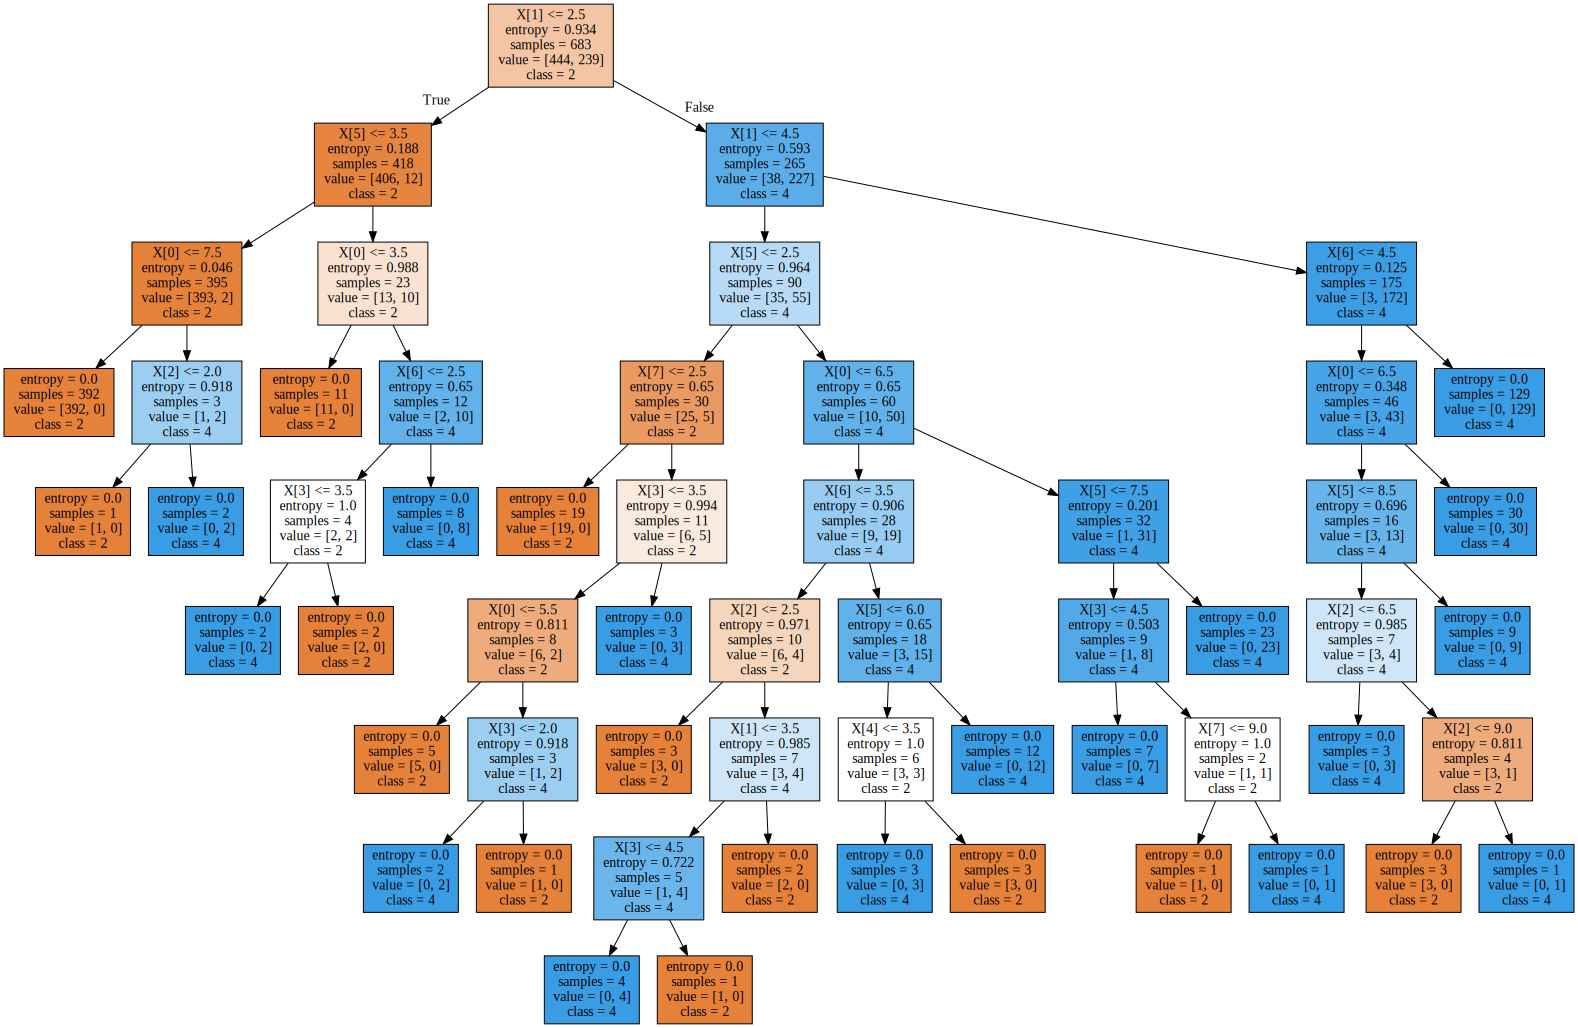

In [0]:
graph= Source(export_graphviz(model,out_file=None,class_names=['2','4'],filled=True))
display(SVG(graph.pipe(format='svg')))

# K-means

In [0]:
from PIL import Image
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
im=Image.open('bird_small.tiff')
pixelMap=im.load()
imgnew=Image.new(im.mode,im.size)
pixelnew=imgnew.load()

In [0]:
k=16
c=[]
for i in range(k):
    c.append(pixelMap[random.randint(0,im.size[0]-1),random.randint(0,im.size[1]-1)])
print(c)

[(125, 125, 101), (237, 224, 114), (240, 235, 176), (15, 16, 15), (249, 161, 129), (135, 108, 48), (173, 132, 71), (21, 21, 18), (14, 15, 14), (243, 204, 137), (202, 158, 124), (205, 174, 180), (192, 150, 86), (31, 35, 33), (190, 164, 89), (227, 216, 162)]


In [0]:
x=[]
itr=0
cluster=[]
while itr<20:
    #finding clusters
    t=c.copy()
    
    cluster=[]
    for i in range(k):
      cluster.append([])
    for i in range(im.size[0]):
        for j in range(im.size[1]):
            dist=[]
            for m in range(k):
                dist.append(np.linalg.norm(np.array(c[m])-np.array(pixelMap[i,j])))
            cluster[dist.index(min(dist))].append(pixelMap[i,j])
            
    #finding centroid
    temp=[]
    for i in range(k):
        s=np.array([0,0,0])
        for j in cluster[i]:
            s[0]+=j[0]
            s[1]+=j[1]
            s[2]+=j[2]
        s=s/len(cluster[i])
        temp.append(s)
    for i in range(k):
        c[i]=temp[i]     
      
    itr+=1
    
#flooring    
final=[]
for i in range(k):
    final.append([])
    for j in range(3):
        final[i].append(int(math.floor(c[i][j])))
print(final)

[[118, 108, 112], [244, 216, 155], [249, 240, 206], [30, 32, 30], [225, 178, 106], [115, 84, 56], [160, 117, 55], [50, 48, 46], [19, 20, 18], [202, 177, 134], [161, 141, 131], [135, 168, 209], [227, 142, 58], [75, 69, 71], [188, 150, 86], [211, 191, 191]]


In [0]:
#assigning new values
for i in range(im.size[0]):
    for j in range(im.size[1]):
        dist=[]
        for m in range(k):
            dist.append(np.linalg.norm(np.array(final[m])-np.array(pixelMap[i,j])))
        pixelnew[i,j]=tuple(final[dist.index(min(dist))])

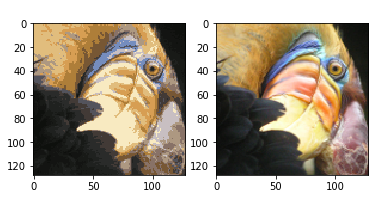

In [0]:
plt.subplot(1,2,1)
plt.imshow(imgnew)
plt.title('Compressed',color='w')
plt.subplot(1,2,2)
plt.imshow(im)
plt.title('Original',color='w')
plt.show()

In [0]:
loss=0
for i in range(im.size[0]):
  for j in range(im.size[1]):
    loss+=np.linalg.norm(np.array(pixelnew[i,j])-np.array(pixelMap[i,j]))**2
print('Avg energy loss:',loss/(im.size[0]*im.size[1]))

Avg energy loss: 592.407470703125


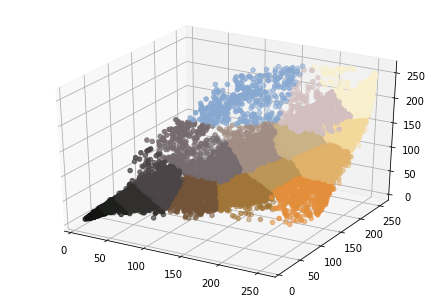

In [0]:
#3d plot

fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(final)):
  ax.scatter([cluster[i][j][0] for j in range(len(cluster[i]))],[cluster[i][j][1] for j in range(len(cluster[i]))],[cluster[i][j][2] for j in range(len(cluster[i]))],c=[np.array(final[i])/255.0 for j in range(len(cluster[i]))])
plt.show()

# PCA

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
k=2
data=pd.read_csv('iris.csv',header=None)
data=data.drop(4,axis=1)
data.head()

FileNotFoundError: ignored

In [0]:
#Mean Centered
mdata=data-data.mean()
mdata.head()

NameError: ignored

In [0]:
#Covariance
cov=mdata.cov()

In [0]:
#Eigen value,vector
eVal,eVec=np.linalg.eig(cov)
eVec=eVec.T
eVal,eVec=zip(*sorted(zip(eVal,eVec),reverse=True))

In [0]:
#new Reduced Data
eVec=eVec[:k]
z=pd.DataFrame(np.dot(data,np.array(eVec).T))
z.head()

,0,1
0,2.827136,-5.641331
1,2.795952,-5.145167
2,2.621524,-5.177378
3,2.764906,-5.003599
4,2.782750,-5.648648


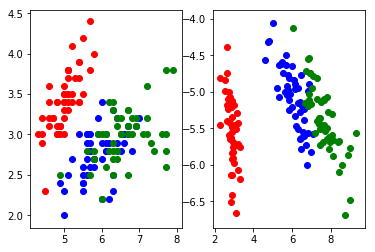

In [0]:
plt.subplot(1,2,1)
plt.scatter(data[:50][0],data[:50][1],color='r')
plt.scatter(data[50:100][0],data[50:100][1],color='b')
plt.scatter(data[100:][0],data[100:][1],color='g')
plt.subplot(1,2,2)
plt.scatter(z[:50][0],z[:50][1],color='r')
plt.scatter(z[50:100][0],z[50:100][1],color='b')
plt.scatter(z[100:][0],z[100:][1],color='g')

# SVM

In [0]:
from sklearn.svm import SVC
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [0]:
cancer=datasets.load_breast_cancer()
data=pd.DataFrame(cancer.data,columns=cancer.feature_names)
y=cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
params={'kernel':('linear','rbf','poly')}
model=SVC(gamma='scale')
clf=GridSearchCV(model,params,cv=5)
clf.fit(data,y)
ypred=clf.predict(data)
accuracy_score(y,ypred)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9666080843585237

# Linear Discriminant Analysis

In [0]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [0]:
cancer=datasets.load_breast_cancer()
data=pd.DataFrame(cancer.data,columns=cancer.feature_names)
y=cancer.target
data['target']=y
data.head()
#data=[[4,2,0],[2,4,0],[2,3,0],[3,6,0],[4,4,0],[9,10,1],[6,8,1],[9,5,1],[8,7,1],[10,8,1]]
#data=pd.DataFrame(data,columns=['x1','x2','target'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
d1=data.loc[data.target==0]
d1=d1.drop(columns=['target'])
d2=data.loc[data.target==1]
d2=d2.drop(columns=['target'])

In [0]:
m1=d1.mean()
m2=d2.mean()

In [0]:
d1=d1-m1
d2=d2-m2
s1=sum([np.matmul( i.reshape(len(i),1) , i.reshape(1,len(i))) for i in d1.values])
s2=sum([np.matmul( i.reshape(len(i),1) , i.reshape(1,len(i))) for i in d2.values])

In [0]:
sw=s1+s2
sb=np.matmul((m1.values-m2.values).reshape(len(m1), 1), (m1.values-m2.values).reshape(1, len(m2)))

In [0]:
A = np.matmul(np.linalg.inv(sw), sb)

In [0]:
eVal,eVec=np.linalg.eig(A)
eVec=eVec.T
eVal,eVec=zip(*sorted(zip(eVal,eVec),reverse=True))

In [0]:
k=1
eVec=eVec[:1]
eVec

(array([ 1.00040512e-02+0.j, -2.08810544e-04+0.j, -1.09056593e-03+0.j,
        -1.46007490e-05+0.j, -3.89046456e-03+0.j,  1.93952602e-01+0.j,
        -6.42214465e-02+0.j, -9.83919045e-02+0.j, -4.71827341e-03+0.j,
        -1.52797770e-03+0.j, -1.99810826e-02+0.j,  3.10471898e-04+0.j,
         1.03453958e-03+0.j,  4.24109466e-05+0.j, -7.28318592e-01+0.j,
        -2.98154428e-03+0.j,  1.63791099e-01+0.j, -4.85472417e-01+0.j,
        -7.79727371e-02+0.j,  3.28294432e-01+0.j, -8.96635676e-03+0.j,
        -3.28888645e-04+0.j,  1.11861784e-04+0.j,  4.64537557e-05+0.j,
        -2.49378545e-02+0.j, -3.08512960e-03+0.j, -1.75112295e-02+0.j,
        -2.13295501e-02+0.j, -2.55778048e-02+0.j, -1.97694168e-01+0.j]),)

In [0]:
data=data.drop(columns=['target'])
z=pd.DataFrame(np.dot(data,np.array(eVec).T))
z.head()

,0
0,(-0.1409101466330904+0j)
1,(-0.1315642786013714+0j)
2,(-0.14484911739686984+0j)
3,(-0.14764989094930717+0j)
4,(-0.13121130075905468+0j)


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [0]:
x=np.array([[4,2],[2,4],[2,3],[3,6],[4,4],[9,10],[6,8],[9,5],[8,7],[10,8]])
y=np.array([0,0,0,0,0,1,1,1,1,1])

In [0]:
model=lda(solver='eigen')
model=model.fit(x,y)

In [0]:
model.transform(x)

array([[ -3.80179624],
       [ -2.96564169],
       [ -2.61072716],
       [ -4.44846253],
       [ -4.51162528],
       [-10.50607141],
       [ -7.47726697],
       [ -8.7314988 ],
       [ -8.66833605],
       [-10.56923417]])

# t Hypothesis testing

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [0]:
data=load_breast_cancer()
x=data.data
y=data.target

In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

In [0]:
clf = LogisticRegression()

kf = KFold(n_splits=10,shuffle=False)

fscore_lr = []

for train_index, test_index in kf.split(x):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  fscore_lr.append(f1_score(y_test, y_pred))
  
fscore_lr

[0.7586206896551725,
 0.958904109589041,
 0.9589041095890412,
 0.9666666666666666,
 0.9655172413793104,
 0.9662921348314608,
 0.9879518072289156,
 0.9767441860465117,
 0.9647058823529412,
 0.9767441860465116]

In [0]:
clf = Perceptron()

kf = KFold(n_splits=10,shuffle=False)

fscore_p = []

for train_index, test_index in kf.split(x):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  fscore_p.append(f1_score(y_test, y_pred))
  
fscore_p

[0.5641025641025641,
 0.9189189189189189,
 0.9444444444444444,
 0.8524590163934426,
 0.8923076923076924,
 0.9156626506024096,
 0.9382716049382716,
 0.9887640449438202,
 0.9024390243902439,
 0.9]

In [0]:
clf = GaussianNB()

kf = KFold(n_splits=10,shuffle=False)

fscore_b = []

for train_index, test_index in kf.split(x):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  fscore_b.append(f1_score(y_test, y_pred))
  
fscore_b

[0.7857142857142858,
 0.888888888888889,
 0.9295774647887323,
 0.9354838709677419,
 0.9491525423728815,
 0.9777777777777777,
 0.9879518072289156,
 0.9772727272727273,
 0.9647058823529412,
 0.9772727272727273]

In [0]:
import numpy as np
from scipy import stats

In [0]:
def t_test(a,b,alpha):
  
  N=len(a)
  
  #For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
  var_a = a.var(ddof=1)
  var_b = b.var(ddof=1)

  #std deviation
  s = np.sqrt((var_a + var_b)/2)

  ## Calculate the t-statistics
  t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



  ## Compare with the critical t-value
  #Degrees of freedom
  df = 2*N - 2

  #p-value after comparison with the t 
  c = stats.t.ppf(1-alpha/2,df=df)
  #print('p = '+ str(stats.t.cdf(t,df=df)))

  print('comparison of t and critical values:')
  print("t = " + str(t))
  print("c = " + str(c))

In [0]:
def inbuilt_t_test(a,b):
  ## Cross Checking with the internal scipy function
  return stats.ttest_ind(a,b,equal_var=False)

In [0]:
print('Logistic vs. Perceptron\n')

t_test(np.array(fscore_lr),np.array(fscore_p),0.05)
t, p = inbuilt_t_test(np.array(fscore_lr),np.array(fscore_p))

print('\np value:')
print("p = " + str(p))
print('statistically significant' if p<0.05 else 'statistically not significant')

Logistic vs. Perceptron

comparison of t and critical values:
t = 1.5530441005217184
c = 2.10092204024096

p value:
p = 0.14220862823785327
statistically not significant


In [0]:
print('Logistic vs. Bayes\n')

t_test(np.array(fscore_lr),np.array(fscore_b),0.05)
t, p = inbuilt_t_test(np.array(fscore_lr),np.array(fscore_b))
print('\np value:')
print("p = " + str(p))
print('statistically significant' if p<0.05 else 'statistically not significant')

Logistic vs. Bayes

comparison of t and critical values:
t = 0.37329204477792366
c = 2.10092204024096

p value:
p = 0.713328791058755
statistically not significant


In [0]:
print('Bayes vs. Perceptron\n')
t_test(np.array(fscore_p),np.array(fscore_b),0.05)
t, p = inbuilt_t_test(np.array(fscore_p),np.array(fscore_b))
print('\np value:')
print("p = " + str(p))
print('statistically significant' if p<0.05 else 'statistically not significant')

Bayes vs. Perceptron

comparison of t and critical values:
t = -1.3304751607573784
c = 2.10092204024096

p value:
p = 0.20530284537476504
statistically not significant


# k medoids

In [0]:
!pip install pyclustering

In [0]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample, calculate_distance_matrix
from pyclustering.samples.definitions import FCPS_SAMPLES
import pandas as pd
from sklearn.datasets import load_iris

[[7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [74, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]


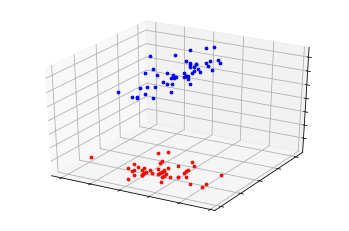

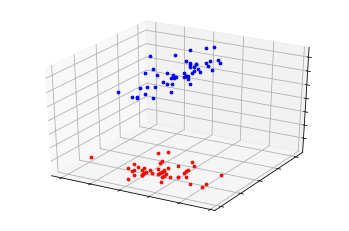

In [0]:

# Load list of points for cluster analysis.
#sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)
data=pd.read_csv("iris.data.csv")
data=data.drop(["species","x1"],axis=1)
sample=data.values.tolist()
#sample=read_sample("K:\iris.data.csv")

# Set random initial medoids.
initial_medoids = [1, 50]
matrix = calculate_distance_matrix(sample)

# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(matrix, initial_medoids, data_type='distance_matrix')

# run cluster analysis and obtain results
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Show allocated clusters.
print(clusters)

# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show() 

# Agnes

In [0]:
import pandas as pd
import numpy as np

In [0]:
data=pd.read_csv("iris.data.csv",header=None)
data.columns=["x1","x2","x3","x4","y"]
data["y"]=data["y"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})
data["x1"]=pd.to_numeric(data["x1"],errors='coerce')
data["x2"]=pd.to_numeric(data["x2"],errors='coerce')
data["x3"]=pd.to_numeric(data["x3"],errors='coerce')
data["x4"]=pd.to_numeric(data["x4"],errors='coerce')
data=data.dropna()

In [0]:
np.array(data['y'].to_list())

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(affinity='euclidean', linkage='ward')
data=data.drop(["y"],axis=1)
y_hc = hc.fit_predict(data)

In [0]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
len(y_hc)


100

# Eigen Faces-incomplete

In [0]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
 
#logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [0]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# to find the shapes for plotting, returns no.of samples, height and width
n_samples, h, w = lfw_people.images.shape
print(h,w)
#data is obtained and number of features is found
X = lfw_people.data
print("data set:",lfw_people.data)
print("target names:",lfw_people.target_names)
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

50 37
data set: [[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]
target names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[1]))

pca = PCA(n_components=n_components).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train

Extracting the top 150 eigenfaces from 1850 faces
Projecting the input data on the eigenfaces orthonormal basis


array([[163.33333 , 148.      , 136.66667 , ..., 217.33333 , 196.66667 ,
        164.66667 ],
       [ 68.666664,  70.666664,  84.666664, ..., 236.33333 , 239.      ,
        237.      ],
       [ 75.666664,  63.333332, 107.333336, ..., 204.66667 , 192.33333 ,
        142.      ],
       ...,
       [139.      , 137.33333 , 135.      , ..., 130.66667 , 105.      ,
         94.333336],
       [ 96.666664,  87.666664,  81.333336, ..., 146.66667 , 148.33333 ,
        145.      ],
       [ 94.      , 102.      , 110.      , ..., 198.      , 101.      ,
         41.666668]], dtype=float32)

In [0]:
print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pca)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
0.41304347826086957
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        20
     Colin Powell       0.00      0.00      0.00        55
  Donald Rumsfeld       0.00      0.00      0.00        25
    George W Bush       0.41      1.00      0.58       133
Gerhard Schroeder       0.00      0.00      0.00        33
      Hugo Chavez       0.00      0.00      0.00        17
       Tony Blair       0.00      0.00      0.00        39

         accuracy                           0.41       322
        macro avg       0.06      0.14      0.08       322
     weighted avg       0.17      0.41      0.24       322

[[  0   0   0  20   0   0   0]
 [  0   0   0  55   0   0   0]
 [  0   0   0  25   0   0   0]
 [  0   0   0 133   0   0   0]
 [  0   0   0  33   0   0   0]
 [  0   0   0  17   0   0   0]
 [  0   0   0  39   0   0   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


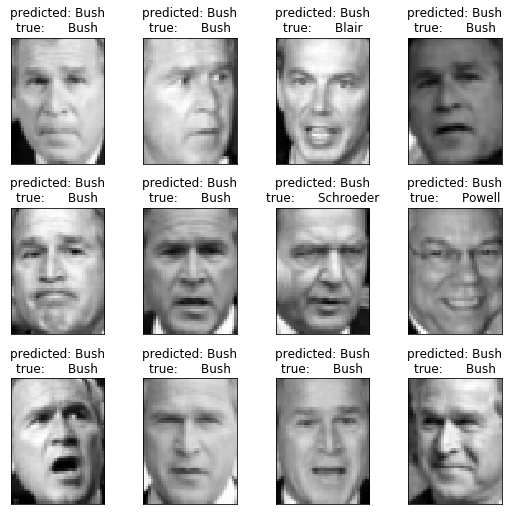

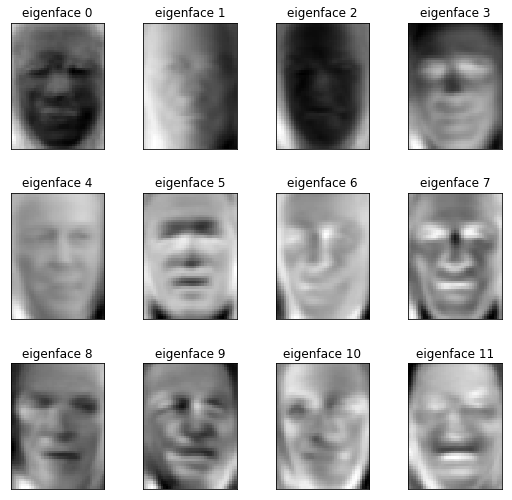

In [0]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, 
                        left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [0]:
import numpy as np
np.array([1,2,3]).reshape(1,-1)

array([[1, 2, 3]])